## importing liberaries

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### importing dataset

In [43]:
df = pd.read_excel("/content/WAR only my dataset.xlsx")
df.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,25,7,0.1,1,50,40,14.2
1,25,7,0.2,1,50,40,16.8
2,25,7,0.3,1,50,40,21.0
3,25,7,0.4,1,50,40,25.8
4,25,7,0.5,1,50,40,34.2


# dependent and independent variables

In [44]:
X = df.drop('Water Absorption reduction (%)', axis = 1)
y = df['Water Absorption reduction (%)']

###rain_Test Split


In [45]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (6, 6)
Testing set size: (2, 6)
Validation set size: (1, 6)


# Standardization

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform (X)
X=pd.DataFrame(X,columns=['Temprature(℃)','PH', 'CaCl₂ (mol/L)', 'Soaking Time (days)', 'Converted Enzyme Conc (g/L)', 'Urea Conc (g/L)	'])
X.head()


,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t
0,0.0,0.0,-1.549193,0.0,0.0,0.0
1,0.0,0.0,-1.161895,0.0,0.0,0.0
2,0.0,0.0,-0.774597,0.0,0.0,0.0
3,0.0,0.0,-0.387298,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0


## Decission tree model

In [47]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion=('squared_error'), max_depth=4, min_samples_split=2, max_features=2, random_state=40)

In [48]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=2, random_state=40)

In [49]:
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

In [50]:
y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)
y_pred_val=DTR.predict(X_val)


### Evaluating Model

In [51]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, DTR.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, DTR.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, DTR.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, DTR.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, DTR.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, DTR.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, DTR.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, DTR.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, DTR.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, DTR.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, DTR.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, DTR.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 0.0000
The MSE on the training dataset is: 0.0000
The MAE on the training daset is: 0.0000
The r2_score on the training dataset is: 1.0000
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 1.8398
The MSE on the testing dataset is: 3.3850
The MAE on the testing dataset is: 1.3500
The r2_score on the testing dataset is: 0.9748
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 4.8000
The MSE on the validation dataset is: 23.0400
The MAE on the validation dataset is: 4.8000
The r2_score on the validation dataset is: nan


### hyperparameter tunning  (optimization)

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param = { 'criterion':['squared_error', 'absolute_error'],
          'splitter':['best'],
          'max_depth':range(2,25),
          'max_features':range(1,6),
          'min_samples_split': range(1,10),
          'min_samples_leaf': range(1,2)
                    }

In [55]:
gcv=GridSearchCV(estimator=DTR ,param_grid=param ,n_jobs=-1,cv=2)

In [56]:
gcv.fit(X_train ,y_train)

GridSearchCV(cv=2,
             estimator=DecisionTreeRegressor(max_depth=4, max_features=2,
                                             random_state=40),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(2, 25), 'max_features': range(1, 6),
                         'min_samples_leaf': range(1, 2),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best']})

In [57]:
gcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [58]:
y_pred_train = gcv.predict(X_train)
y_pred_test = gcv.predict(X_test)
y_pred_val=gcv.predict(X_val)

### Evaluating The optimized model

In [59]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, gcv.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, gcv.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, gcv.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, gcv.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, gcv.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, gcv.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, gcv.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, gcv.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, gcv.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, gcv.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, gcv.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, gcv.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 0.2848
The MSE on the training dataset is: 0.0811
The MAE on the training daset is: 0.1889
The r2_score on the training dataset is: 0.9986
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 1.8535
The MSE on the testing dataset is: 3.4356
The MAE on the testing dataset is: 1.4667
The r2_score on the testing dataset is: 0.9745
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 4.8000
The MSE on the validation dataset is: 23.0400
The MAE on the validation dataset is: 4.8000
The r2_score on the validation dataset is: nan


#DT graph

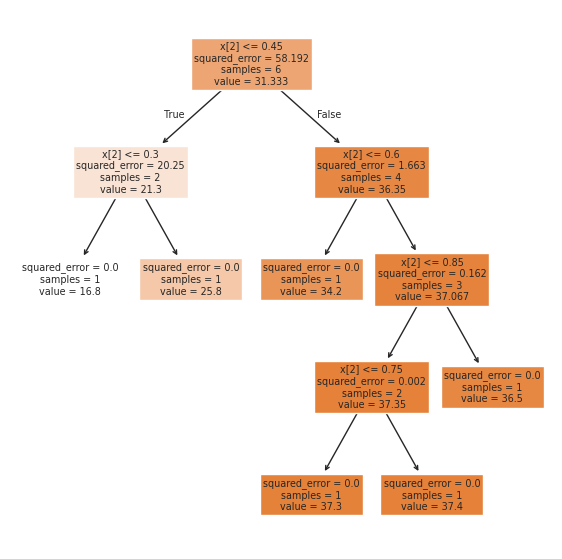

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize =(7,7))
fontsize=50
max_depth=12
plot_tree(DTR,filled = True)
plt.show()

### Feature importace for DT regression

In [62]:
gcv.best_estimator_.feature_importances_

array([0., 0., 1., 0., 0., 0.])

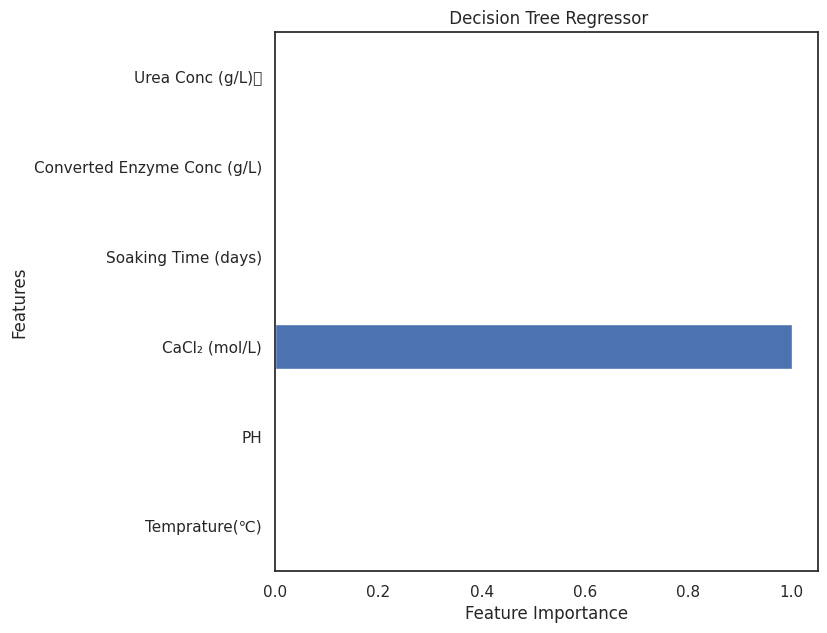

In [63]:
importances = pd.Series(gcv.best_estimator_.feature_importances_ , index=X.columns)
sns.set_style('white')
importances.plot(kind = 'barh', figsize=(7,7))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(" Decision Tree Regressor")
plt.show()

### Actual Vs Predicted Capacity

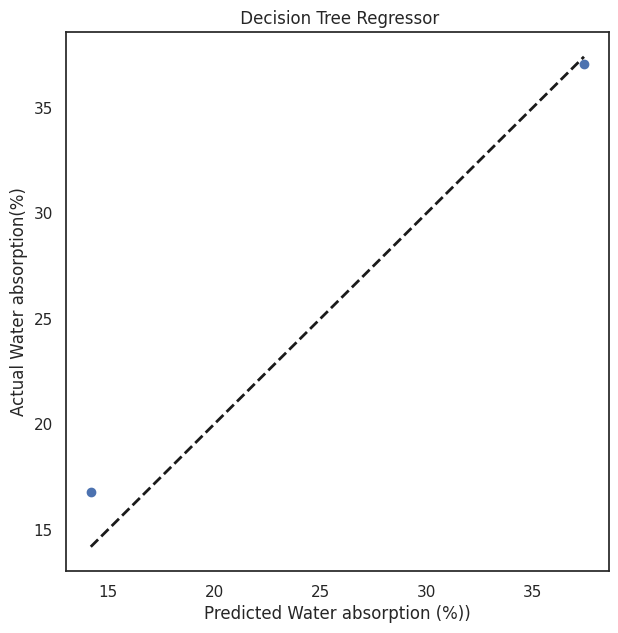

In [64]:
plt.figure(figsize=(7,7))
sns.set_style("white")
plt.xlabel("Predicted Water absorption (%))")
plt.ylabel("Actual Water absorption(%)")
plt.title(" Decision Tree Regressor")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [65]:
new_data = pd.DataFrame({
     'Temprature(℃)': [25, 25, 25, 25, 25, 25, 25, 25, 25],
    'PH': [7, 7, 7, 7, 7, 7, 7, 7, 7],
    'CaCl₂ (mol/L)': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'Soaking Time (days)': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Converted Enzyme Conc (g/L)': [50, 50, 50, 50, 50, 50, 50, 50, 50],
    'Urea Conc (g/L)': [40,40, 40, 40, 40, 40, 40, 40, 40],
    'Water Absorption reduction (%)': [14.2,16.8, 21, 25.8, 34.2, 37.4, 37.3, 37.36, 36.5]
})

display(new_data)

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,25,7,0.1,1,50,40,14.20
1,25,7,0.2,1,50,40,16.80
2,25,7,0.3,1,50,40,21.00
3,25,7,0.4,1,50,40,25.80
4,25,7,0.5,1,50,40,34.20
5,25,7,0.6,1,50,40,37.40
6,25,7,0.7,1,50,40,37.30
7,25,7,0.8,1,50,40,37.36
8,25,7,0.9,1,50,40,36.50


In [66]:
new_predictions = gcv.predict(new_data.drop('Water Absorption reduction (%)', axis=1))

In [67]:
new_data['Predicted Water Absorption reduction (%)'] = new_predictions
display(new_data)

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%),Predicted Water Absorption reduction (%)
0,25,7,0.1,1,50,40,14.20,16.800000
1,25,7,0.2,1,50,40,16.80,16.800000
2,25,7,0.3,1,50,40,21.00,25.800000
3,25,7,0.4,1,50,40,25.80,25.800000
4,25,7,0.5,1,50,40,34.20,34.200000
5,25,7,0.6,1,50,40,37.40,37.066667
6,25,7,0.7,1,50,40,37.30,37.066667
7,25,7,0.8,1,50,40,37.36,37.066667
8,25,7,0.9,1,50,40,36.50,37.066667


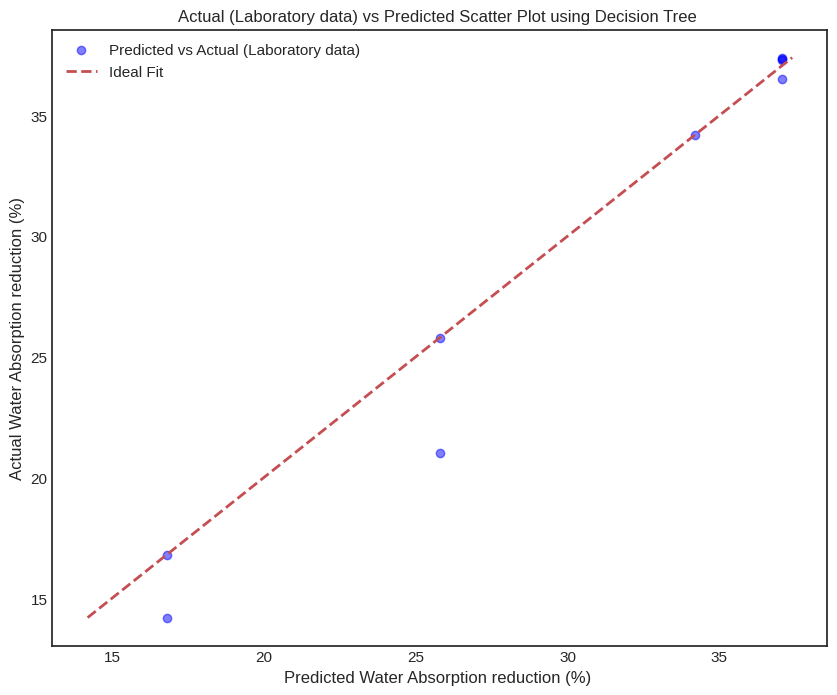

In [68]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-white')
plt.scatter(new_data['Predicted Water Absorption reduction (%)'], new_data['Water Absorption reduction (%)'], color="blue", alpha=0.5, label="Predicted vs Actual (Laboratory data)")
plt.plot([new_data['Water Absorption reduction (%)'].min(), new_data['Water Absorption reduction (%)'].max()],
         [new_data['Water Absorption reduction (%)'].min(), new_data['Water Absorption reduction (%)'].max()],
         'r--', lw=2, label="Ideal Fit")
plt.xlabel("Predicted Water Absorption reduction (%) ")
plt.ylabel("Actual Water Absorption reduction (%)")
plt.title("Actual (Laboratory data) vs Predicted Scatter Plot using Decision Tree ")
plt.legend()
plt.show()